In [1]:
import keras
from train_gan import GAN, GeneratorProgressionCallback
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np

In [2]:
gan = keras.models.load_model("../../models/gan.keras")

In [3]:
def generate_examples(gan):
    X, y = GeneratorProgressionCallback.source_data_generator(gan.generator.input.shape[1], 100)
    generated = gan.generator.predict(X)
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(30, 15))
    plt.axis('off')
    for ax in axes:
        for _ in ax:
            _.set_xticks([])
            _.set_yticks([])
    for elid in range(100):
        axes[elid // 10, elid % 10].imshow(generated[elid], cmap='gray')

    plt.savefig("gan_examples.png")

In [4]:
def make_gif(gan, origin, eps, accumulate=True):
    frames = []
    for _ in range(200):
        elid = np.random.randint(len(origin[0]))
        delta = np.zeros((1, len(origin[0])))
        delta[0, elid] = eps * np.random.rand()
        X = origin + delta
        generated = gan.generator.predict(X, verbose=0)
        frames.append(Image.fromarray(np.uint8(generated[0, :, :, 0] * 255) , 'L').resize((64, 64)))
        if accumulate:
            origin = X
    
    frame_one = frames[0]
    frame_one.save("gan_random_walk.gif", format="GIF", append_images=frames,
               save_all=True, duration=150, loop=0)

4/4 [==============================] - 0s 26ms/step


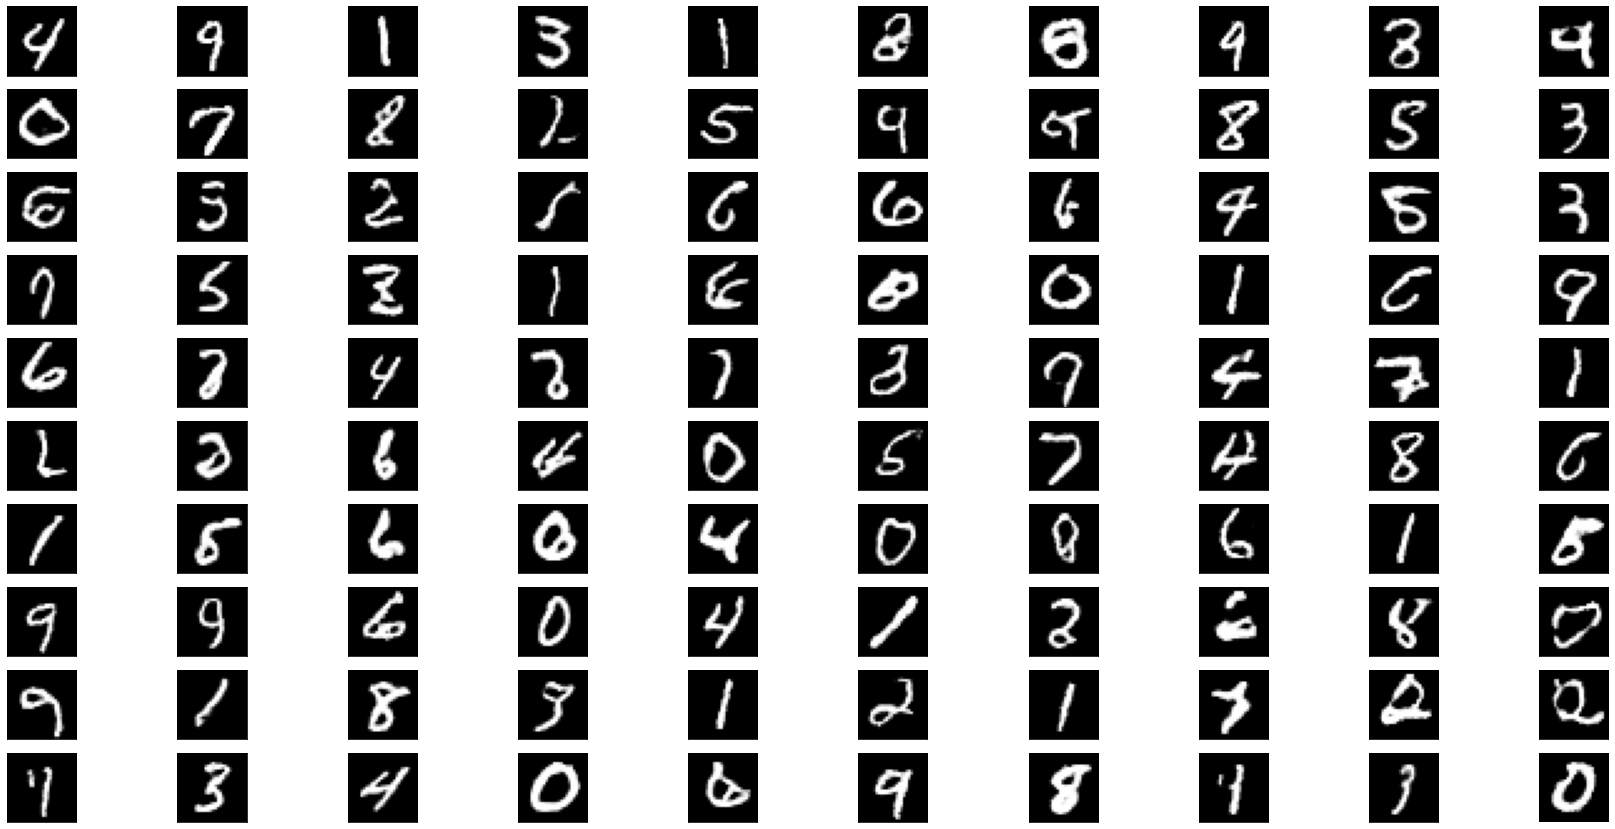

In [5]:
X = np.zeros((1, 100))
# X, y = GeneratorProgressionCallback.source_data_generator(gan.generator.input.shape[1], 1)
make_gif(gan, origin=X, eps=1, accumulate=True)
generate_examples(gan)